[View in Colaboratory](https://colab.research.google.com/github/kchuang1015/GoogleColab/blob/master/BasicClassification.ipynb)

# Import

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


# Load the Fushion MNIST dataste

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

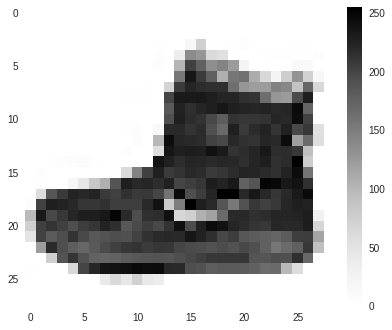

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

# Preprocess the data

In [0]:
# Mapping inputs into [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

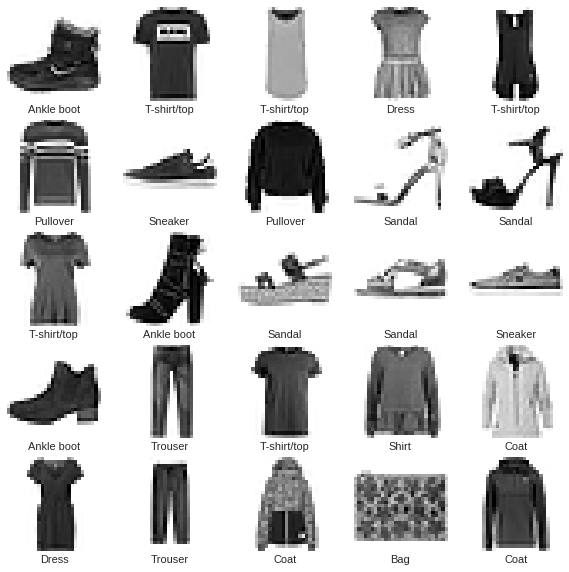

In [11]:
plt.figure( figsize = ( 10, 10 ) )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.grid( 'off' )
    plt.imshow( train_images[i], cmap=plt.cm.binary )
    plt.xlabel( class_names[ train_labels[ i ] ] )

#Build the model

## Reshpe data

In [0]:
''' 
Reshape the data into 4 dimention, 4D tensor with shape: (batch, channels, rows, cols) if data_format is "channels_first" 
or 4D tensor with shape: (batch, rows, cols, channels) if data_format is "channels_last".
'''
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [13]:
# Show the dimentions
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Model definition


In [0]:
model = keras.Sequential([
    keras.layers.Conv2D( filters=16, kernel_size=(3, 1),
                 activation='relu',
                 input_shape = (28, 28, 1) ),
    keras.layers.Conv2D( filters=16, kernel_size=(1, 3),
                 activation='relu'),
    #keras.layers.Conv2D( filters=16, kernel_size=(3, 3),
    #             activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( filters=32, kernel_size=(3, 1),
                 activation='relu'),
    keras.layers.Conv2D( filters=32, kernel_size=(1, 3),
                 activation='relu'),
    #keras.layers.Conv2D( filters=32, kernel_size=(3, 3),
    #             activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Optimization

In [0]:
model.compile( optimizer=tf.train.AdamOptimizer(), 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

## Training

In [16]:
model.fit( train_images, train_labels, epochs=100, validation_data=(test_images, test_labels) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 290us/step - loss: 0.5053 - acc: 0.8205 - val_loss: 0.3375 - val_acc: 0.8786
Epoch 2/100
60000/60000 [==============================] - 16s 261us/step - loss: 0.3593 - acc: 0.8732 - val_loss: 0.3577 - val_acc: 0.8670
Epoch 3/100
60000/60000 [==============================] - 16s 262us/step - loss: 0.3228 - acc: 0.8876 - val_loss: 0.3407 - val_acc: 0.8759
Epoch 4/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.2988 - acc: 0.8938 - val_loss: 0.2873 - val_acc: 0.8991
Epoch 5/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.2865 - acc: 0.8987 - val_loss: 0.2849 - val_acc: 0.8954
Epoch 6/100
60000/60000 [==============================] - 16s 260us/step - loss: 0.2705 - acc: 0.9044 - val_loss: 0.2896 - val_acc: 0.8947
Epoch 7/100
60000/60000 [==============================] - 16s 261us/step - loss: 0.2625 - acc: 0.9069 - val_l

## Evaluation accuray of test data

In [17]:
test_loss, test_acc = model.evaluate( test_images, test_labels )

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 76us/step
Test accuracy: 0.9095


##Make predictions

In [0]:
predictions = model.predict( test_images )

In [19]:
predictions[0]

array([5.1654798e-11, 3.0385989e-11, 1.2486964e-09, 1.1895609e-10,
       1.2023079e-09, 7.6509259e-06, 1.0897405e-10, 1.0520069e-04,
       2.7303248e-08, 9.9988711e-01], dtype=float32)

In [20]:
np.argmax( predictions[ 0 ] )

9

In [21]:
test_labels[0]

9

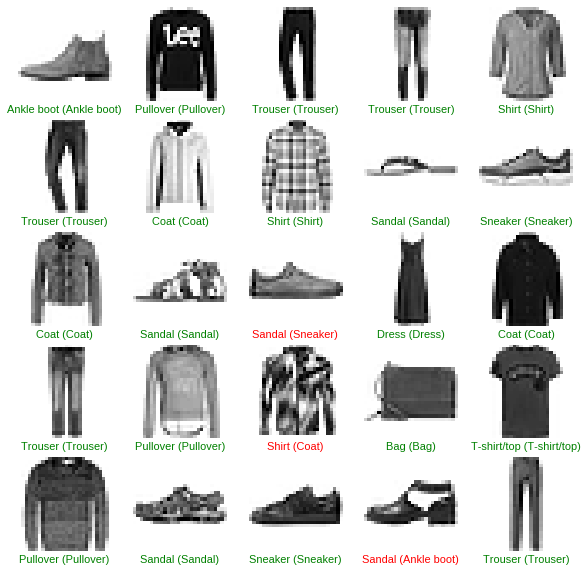

In [22]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
test_images = test_images.reshape(test_images.shape[0], 28, 28)
plt.figure( figsize = (10, 10) )
for i in range(25):
    plt.subplot( 5, 5, i + 1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.grid( 'off' )
    plt.imshow( test_images[i], cmap=plt.cm.binary )
    predicted_label = np.argmax( predictions[i] )
    true_label = test_labels[ i ]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format( class_names[predicted_label], 
                                 class_names[true_label]),
              color=color)

In [23]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
img = img.reshape(img.shape[0], 28, 28, 1)
predictions = model.predict(img)
print(predictions)

[[5.16552946e-11 3.03862213e-11 1.24870581e-09 1.18956997e-10
  1.20231936e-09 7.65098412e-06 1.08974892e-10 1.05201696e-04
  2.73034058e-08 9.99887109e-01]]


In [26]:
prediction = predictions[0]

np.argmax(prediction)

9